# Analisis Asuransi Kesehatan 

### Deskripsi Data:

- age: Usia
- sex: Jenis Kelamin
- bmi: Indeks masa tubuh
- children: Anak yang ditanggung oleh asuransi kesehatan
- smoker: Merokok atau tidaknya
- region: Area tempat tinggal
- charges: Biaya yang yang ditagih oleh asuransi kesehatan

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Deskriptif Statistik

In [4]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Agar data lebih mudah dibaca khususnya oleh oleh orang awam, maka:



In [5]:
#Berapa rata rata umur pada data tersebut?
mean_umur = df['age'].mean()
print(f"Rata-rata umur pada data tersebut adalah {mean_umur}")

#Berapa rata rata nilai BMI dari yang merokok?
smoker = df.loc[df['smoker'] == 'yes']
non_smoker = df.loc[df['smoker'] == 'no']

avg_bmi_smoker = smoker['bmi'].mean()
print(f"Rata-rata nilai BMI dari yang merokok pada data tersebut adalah {avg_bmi_smoker}")

#Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

smoker_var = smoker['charges'].var()
smoker_std = smoker['charges'].std()

non_smoker_var = non_smoker['charges'].var()
non_smoker_std = non_smoker['charges'].std()

print(f"Variansi dari tagihan kesehatan perokok pada data tersebut adalah {smoker_var}")
print(f"Variansi dari tagihan kesehatan non perokok pada data tersebut adalah {non_smoker_var}")
print('Variansi dari tagihan kesehatan perokok dan non perokok tidak sama.')

#Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

#smoker
male_smoker = smoker.loc[smoker['sex'] == 'male']
female_smoker = smoker.loc[smoker['sex'] == 'female']

#non smoker
male_non_smoker = non_smoker.loc[non_smoker['sex'] == 'male']
female_non_smoker = non_smoker.loc[non_smoker['sex'] == 'female']

#rata-rata umur male smoker
male_smoker_age_mean = male_smoker['age'].mean()
print(f'Rata-rata umur perokok laki-laki adalah {male_smoker_age_mean}')
#rata-rata umur female smoker
female_smoker_age_mean = female_smoker['age'].mean()
print(f'Rata-rata umur perokok perempuan adalah {female_smoker_age_mean}')
print('Rata-rata umur perokok perempuan dan laki-laki tidak sama.')

# Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
smoker_charges_mean = smoker['charges'].mean()
non_smoker_charges_mean = non_smoker['charges'].mean()

if smoker_charges_mean > non_smoker_charges_mean:
    print(f"Rata-rata tagihan kesehatan perokok ({smoker_charges_mean}) lebih tinggi daripada non perokok ({non_smoker_charges_mean})")
elif smoker_charges_mean < non_smoker_charges_mean:
    print(f"Rata-rata tagihan kesehatan perokok ({smoker_charges_mean}) lebih rendah daripada non perokok ({non_smoker_charges_mean})")
else :
    print("Rata-rata tagihan kesehatan perokok sama dengan non perokok")


Rata-rata umur pada data tersebut adalah 39.20702541106129
Rata-rata nilai BMI dari yang merokok pada data tersebut adalah 30.70844890510949
Variansi dari tagihan kesehatan perokok pada data tersebut adalah 133207311.20634924
Variansi dari tagihan kesehatan non perokok pada data tersebut adalah 35925420.496111736
Variansi dari tagihan kesehatan perokok dan non perokok tidak sama.
Rata-rata umur perokok laki-laki adalah 38.44654088050314
Rata-rata umur perokok perempuan adalah 38.608695652173914
Rata-rata umur perokok perempuan dan laki-laki tidak sama.
Rata-rata tagihan kesehatan perokok (32050.23183153284) lebih tinggi daripada non perokok (8434.268297856204)


### Visualisasi variable kategorik

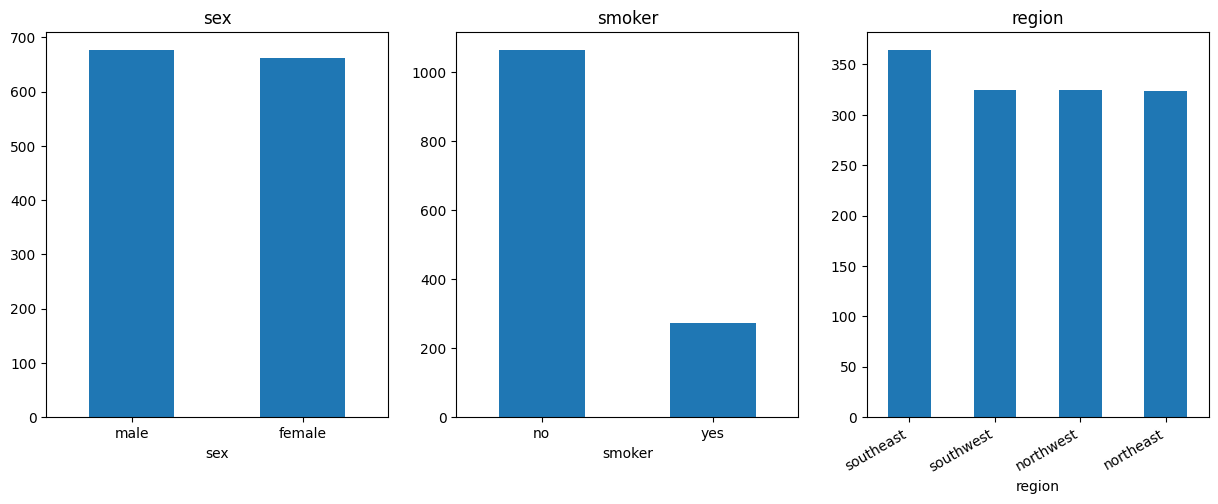

In [6]:
categorical_features = ['sex', 'smoker', 'region']
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind='bar',rot=0, 
                                    figsize = (15, 5), ax=ax[i]).set_title(categorical_feature)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

### Distribusi dari variabel numerik

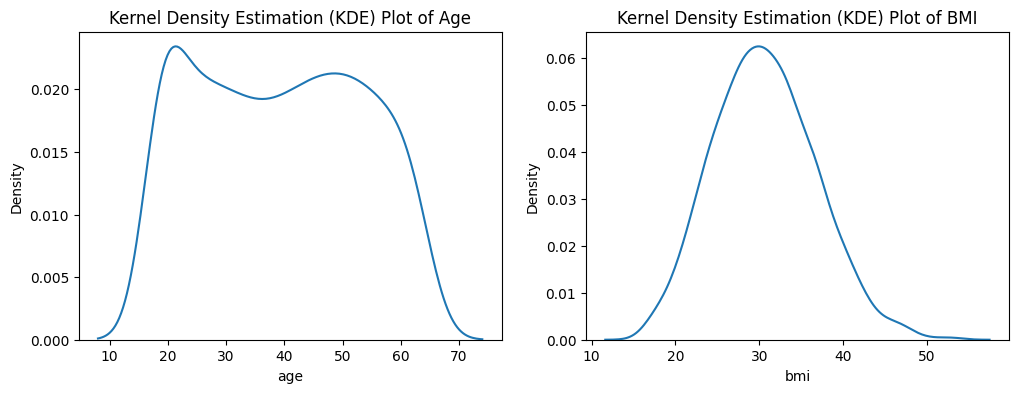

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.kdeplot(data=df, x="age", ax=axs[0])
axs[0].set_title("Kernel Density Estimation (KDE) Plot of Age")

sns.kdeplot(data=df, x="bmi", ax=axs[1])
axs[1].set_title("Kernel Density Estimation (KDE) Plot of BMI")

plt.show()

### Melihat hubungan antara 2 variabel numerik

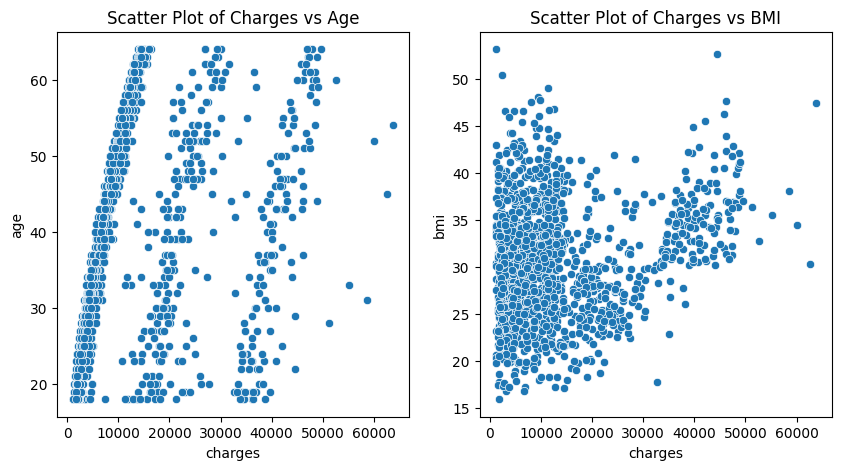

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.scatterplot(data=df, x=df["charges"], y=df["age"], ax=ax1)
ax1.set_title("Scatter Plot of Charges vs Age")

sns.scatterplot(data=df, x=df["charges"], y=df["bmi"], ax=ax2)
ax2.set_title("Scatter Plot of Charges vs BMI")

plt.show()

### Probability Mass Function

### Analisa Peluang pada Variabel Diskrit

In [50]:
# 1. Gender mana yang memiliki tagihan paling tinggi?

gender_charges_sum = df.groupby('sex')['charges'].sum()

male_charges_sum = gender_charges_sum.loc['male']
female_charges_sum = gender_charges_sum.loc['female']

print('Total tagihan asuransi pria:', male_charges_sum)
print('Total tagihan asuransi wanita:', female_charges_sum)

Total tagihan asuransi pria: 9434763.79614
Total tagihan asuransi wanita: 8321061.194619


total tagihan laki-laki lebih tinggi dari pada perempuan

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


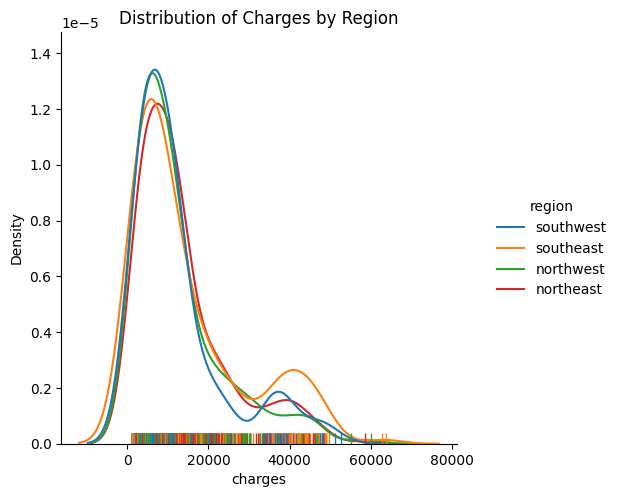

In [56]:
# 2. Distribusi peluang tiap-tiap region

sns.displot(data=df, x="charges", hue="region", kind="kde", rug=True, legend=True)
plt.title('Distribution of Charges by Region')
plt.show()

In [59]:
# Menghitung jumlah data untuk setiap region
count_by_region = df['region'].value_counts()

# Menghitung total jumlah data
total_count = len(df)

# Menghitung proporsi data untuk setiap region
proporsi_by_region = count_by_region / total_count

# Menguji apakah setiap region memiliki proporsi data yang sama
if np.allclose(proporsi_by_region, proporsi_by_region.mean(), rtol=0.01):
    print(proporsi_by_region)
else:
    print("Setiap region tidak memiliki proporsi data banyak orang yang sama.")
    print(proporsi_by_region)

Setiap region tidak memiliki proporsi data banyak orang yang sama.
region
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: count, dtype: float64


In [60]:
# 3. Proporsi perokok dengan non perokok

n_smokers = (df['smoker'] == 'yes').sum()
n_non_smokers = (df['smoker'] == 'no').sum()
n_total = len(df)

p_smokers = n_smokers / n_total
p_non_smokers = n_non_smokers / n_total

print('proporsi pengguna perokok adalah', p_smokers)
print('proporsi pengguna non-perokok adalah', p_non_smokers)

proporsi pengguna perokok adalah 0.20478325859491778
proporsi pengguna non-perokok adalah 0.7952167414050823


Proporsi non-perokok lebih tinggi dari proporsi perokok

In [62]:
# 4. Peluang dia perempuan dan dia merokok

# Menghitung jumlah total nasabah
n_total = len(df)

# Menghitung jumlah nasabah perempuan
n_female = df['sex'].value_counts()['female']

# Menghitung peluang nasabah perempuan
p_female = n_female / n_total

# Menghitung jumlah nasabah perokok
n_smokers = df['smoker'].value_counts()['yes']

# Menghitung peluang nasabah perokok
p_smoker = n_smokers / n_total

# Menghitung jumlah nasabah perempuan yang merokok
female_smokers = df.loc[(df['sex'] == 'female') & (df['smoker'] == 'yes')]
n_female_smokers = len(female_smokers)

# Menghitung peluang nasabah merokok yang perempuan
p_smoker_given_female = n_female_smokers / n_female

# Menghitung peluang nasabah perempuan yang merokok
p_female_smoker = p_female * p_smoker_given_female

# Menghitung peluang nasabah perempuan jika diketahui dia merokok
p_female_given_smoker = p_female_smoker / p_smoker

print('Peluang seseorang adalah perempuan diketahui dia adalah perokok:', p_female_given_smoker)

Peluang seseorang adalah perempuan diketahui dia adalah perokok: 0.4197080291970803


In [65]:
# 5. Peluan dia lki-laki dan dia merokok

# Menghitung jumlah nasabah laki-laki
n_male = df['sex'].value_counts()['male']

# Menghitung peluang nasabah laki-laki
p_male = n_male / n_total

# Menghitung jumlah nasabah laki-laki yang merokok
male_smokers = df.loc[(df['sex'] == 'male') & (df['smoker'] == 'yes')]
n_male_smokers = len(male_smokers)

# Menghitung peluang nasabah laki-laki yang merokok
p_smoker_given_male = n_male_smokers / n_male

# Menghitung peluang seseorang adalah laki-laki diketahui dia adalah perokok
p_male_given_smoker = p_smoker_given_male * p_male / p_smoker

print('Peluang seseorang adalah laki-laki diketahui dia adalah perokok:', p_male_given_smoker)

Peluang seseorang adalah laki-laki diketahui dia adalah perokok: 0.5802919708029198


### Analisa Pelauang pada Variabel Continue

In [66]:
# Seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k, atau Seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k

# Membuat kolom baru untuk membagi nilai BMI menjadi 'BMI<=25' dan 'BMI>25'
df['bmi_group'] = pd.cut(df['bmi'], bins=[0, 25, np.inf], labels=['BMI<=25', 'BMI>25'])

# Menghitung jumlah nasabah dengan tagihan di atas 16.7K untuk setiap grup BMI
df1 = df[df['charges'] > 16700].groupby('bmi_group')['age'].count().to_frame(name='count')

# Menghitung proporsi nasabah dengan tagihan di atas 16.7K untuk setiap grup BMI
df1['peluang'] = df1['count'] / df1['count'].sum()

# Menampilkan hasil
print(df1)

           count   peluang
bmi_group                 
BMI<=25       51  0.152695
BMI>25       283  0.847305


Jadi seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k memiliki peluang lebih tinggi dibandingkan eseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k.

### Analisa Korelasi Variabel

In [9]:
df_numerik = df.drop(['sex', 'smoker', 'region'], axis=1)

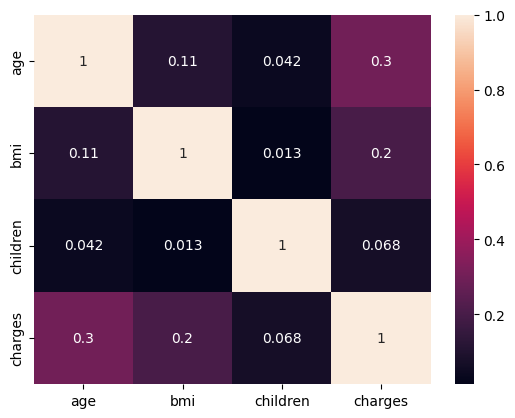

In [10]:
# menghitung korelasi antara kolom numerik
corr = df_numerik.corr()

# menampilkan heatmap
sns.heatmap(corr, annot = True)
plt.show()

In [11]:
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Dalam tabel korelasi di atas, nilai korelasi antara 'age' dan 'charges' adalah 0.298308, nilai korelasi antara 'bmi' dan 'charges' adalah 0.198401, dan nilai korelasi antara 'children' dan 'charges' adalah 0.067389. Oleh karena itu, dapat disimpulkan bahwa 'age' memiliki pengaruh yang lebih besar terhadap 'charges' dibandingkan 'bmi' dan 'children'. Sedangkan pengaruh 'bmi' lebih besar dibandingkan 'children'.

<center>

<h1 style="font-size: 36px;">Pengujian Hypotesis</h1>

</center>

##### 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

In [46]:
alpha = 0.05

# Pisahkan data charges berdasarkan variabel smoker
charges_per_smoker = [df.loc[df['smoker'] == 'yes', 'charges'], df.loc[df['smoker'] == 'no', 'charges']]

# Uji perbedaan rata-rata antara kedua kelompok menggunakan t-test
stat, p = stats.ttest_ind(charges_per_smoker[0], charges_per_smoker[1])

print(f'T-statistic = {stat:.4f}, p-value = {p:.4f}')

if p < alpha:
    print(f'H0 diterima, tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non-perokok')
else:
    print(f'Tolak H0, H1 diterima.')

T-statistic = 46.6649, p-value = 0.0000
H0 diterima, tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non-perokok


##### 2. Tagihan kesehatan laki-laki lebih besar dari perempuan

In [47]:
# Menghitung rata-rata tagihan kesehatan untuk masing-masing kelompok
mean_charge_by_sex = df.groupby('sex')['charges'].mean()

# Uji perbedaan mean menggunakan t-test
stat, p = stats.ttest_ind(df.loc[df['sex'] == 'male', 'charges'], df.loc[df['sex'] == 'female', 'charges'])

print(f'T-statistic = {stat:.4f}, p-value = {p:.4f}')

if p < alpha:
    print(f'H0 diterima, tagihan kesehatan laki-laki lebih besar dari perempuan')
else:
    print(f'Tolak H0, H1 diterima.')

T-statistic = 2.0975, p-value = 0.0361
H0 diterima, tagihan kesehatan laki-laki lebih besar dari perempuan


##### 3. Proporsi perokok laki laki lebih besar dari perempuan

In [48]:
# Menghitung jumlah pria dan wanita perokok
smoker_by_sex = df.loc[df['smoker'] == 'yes', 'sex'].value_counts()

# Menghitung total pria dan wanita
total_by_sex = df['sex'].value_counts()

stat, p = proportions_ztest([smoker_by_sex['female'], smoker_by_sex['male']], [total_by_sex['female'], total_by_sex['male']], alternative='two-sided')

print(f'Z-statistic = {stat:.4f}, p-value = {p:.4f}')

# Cetak hasil uji proporsi
if p < alpha:
    print(f'H0 ditolak, proporsi tidak sama. Jauh lebih besar laki-laki perokok')
else:
    print(f'H0 diterima, proporsi sama')

Z-statistic = -2.7867, p-value = 0.0053
H0 ditolak, proporsi tidak sama. Jauh lebih besar laki-laki perokok
